In [127]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist

#Prepare and display dataset


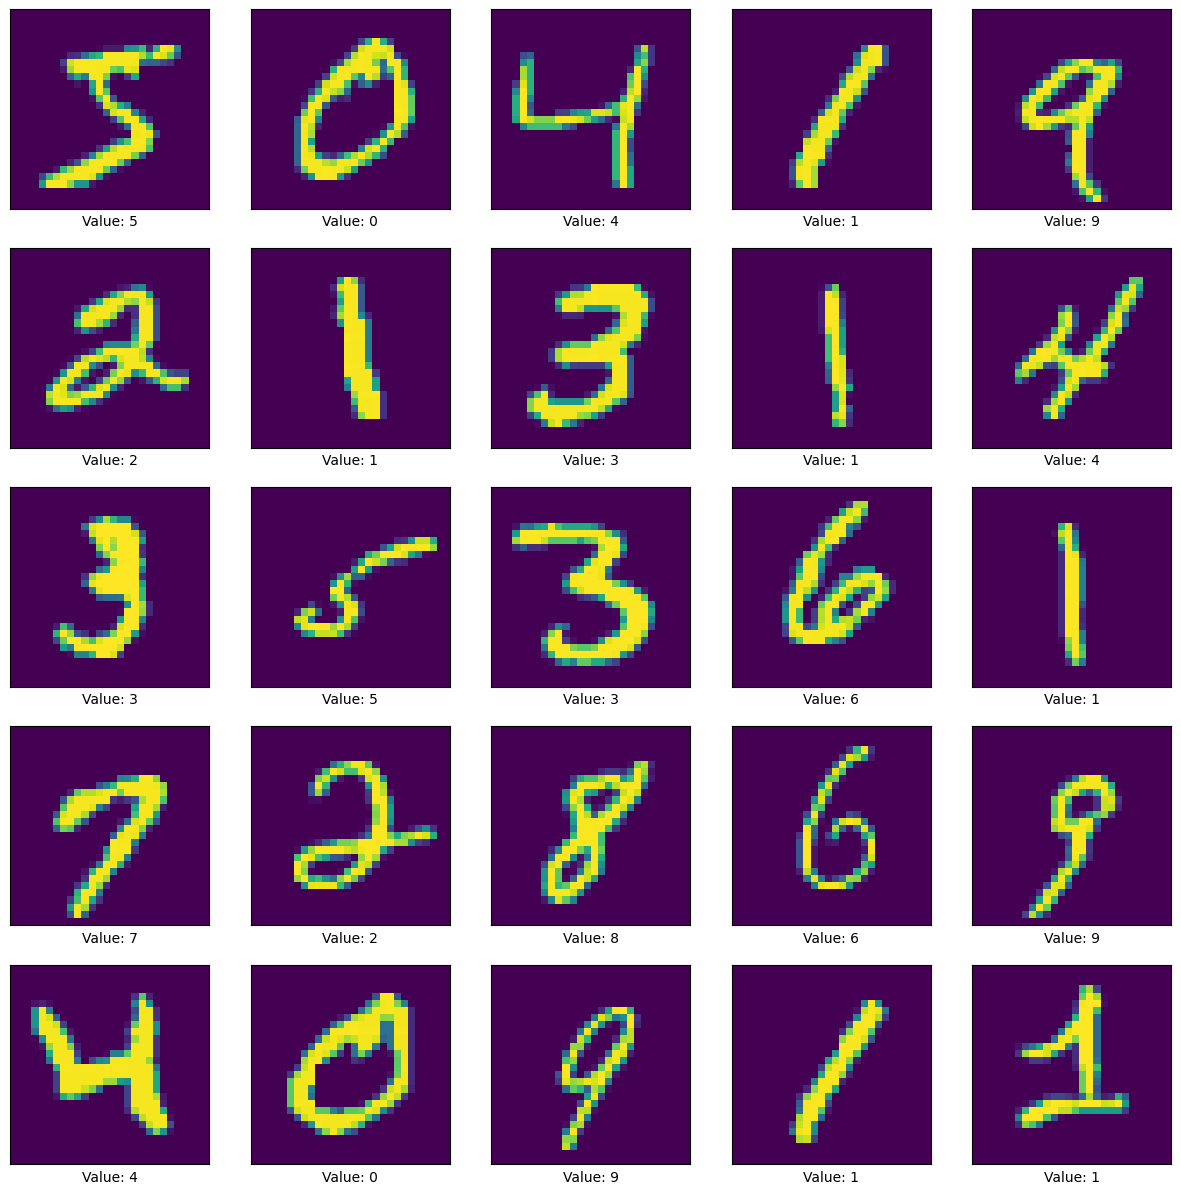

In [128]:
# Downloading mnist dataset
(image_train,  value_train), (image_test, value_test) = mnist.load_data()

# Displaying the part of mnist dataset
def display_dataset(x, y):
    plt.figure(figsize = (15, 15))
    for i in range (25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image_train[i])
        plt.xlabel(f'Value: {value_train[i]}')
    plt.show()

display_dataset(image_train, value_train)

# Preparing dataset for NN training
image_train = image_train.astype('float32') / 255.0
image_test= image_test.astype('float32') / 255.0

value_train = utils.to_categorical(value_train, 10)
value_test = utils.to_categorical(value_test, 10)


#Create and train model

In [129]:
# Function for sequential model creation
def create_model():
    # Sequential model creation
    model = Sequential([Flatten(input_shape = (28, 28)),
                        Dense(32, activation = 'relu'),
                        Dense(10, activation = 'softmax')])
    # Displaying the information about model
    model.summary()

    # Compiling model
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [130]:
# Function for model training
def train_model(model, epochs, batch):
    # Training
    history = model.fit(image_train, value_train, epochs = epochs,
                        batch_size = batch, validation_split = 0.1)

    # Getting info about training loss and accuracy
    test_loss, test_accuracy = model.evaluate(image_test, value_test)

    return history, test_loss, test_accuracy

In [131]:
# Function for plotting graps with statistics
def show_loss_n_accuracy_info(history):
    # Plotting "Loss over time" graph
    plt.plot(history['loss'], label = 'Training loss')
    plt.plot(history['val_loss'], label = 'Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('"Loss over time" graph')
    plt.legend()
    plt.show()

    # Plotting "Accuracy over time" graph
    plt.plot(history['accuracy'], label = 'Training accuracy')
    plt.plot(history['val_accuracy'], label = 'Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('"Accuracy over time" graph')
    plt.legend()
    plt.show()

In [132]:
# Function for model prediction tests
def test_model_predictions_for_rnd_elements(model, x_test, y_test, samples = 10):
    # Getting 10 random element indexes from test part of the mnist dataset
    random_index = np.random.choice(x_test.shape[0], size = samples, replace = False)

    # Displaying all random elements from test part pf the mnist dataset with their actual values
    print("=========================================================================\n=========================================================================")
    print("10 random elements of test dataset:")
    counter = 0
    plt.figure(figsize = (15, 15))
    for i in random_index:
        counter += 1
        plt.subplot(5, 5, counter)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_test[i])
        prediction = model.predict(x_test[i:i + 1])
        print("Prediction:", np.argmax(prediction), "\n")
        plt.xlabel(f"Actual value: {np.argmax(y_test[i])} | Prediction: {np.argmax(prediction)}")
    plt.show()

    # Displaying random elements from test part of the mnist dataset one-by-one with their actual values and model predictions
    print("=========================================================================\n=========================================================================")
    print("Predictions for each element:")
    for i in random_index:
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_test[i])
        plt.xlabel(f'Actual value: {np.argmax(y_test[i])}')
        plt.show()
        prediction = model.predict(x_test[i:i + 1])
        print(f"Prediction: {np.argmax(prediction)}\n")

#Main

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 784)               0         
                                                                 
 dense_56 (Dense)            (None, 32)                25120     
                                                                 
 dense_57 (Dense)            (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/40
270/270 [==============================] - 2s 4ms/step - loss: 0.6169 - accuracy: 0.8338 - val_loss: 0.2697 - val_accuracy: 0.9260
Epoch 2/40
270/270 [==============================] - 1s 4ms/step - loss: 0.2877 - accuracy: 0.9184 - val_loss: 0.2095 - val_accuracy: 0.94

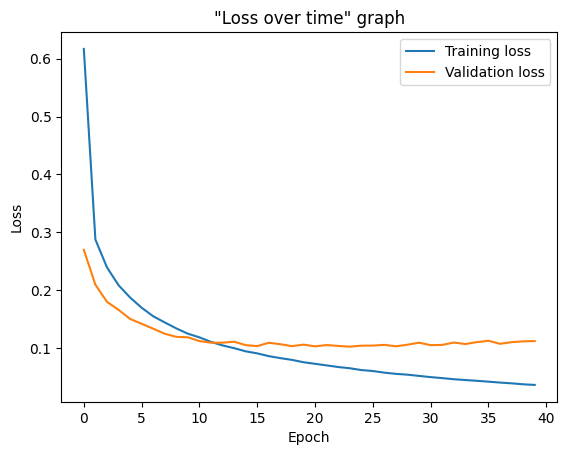

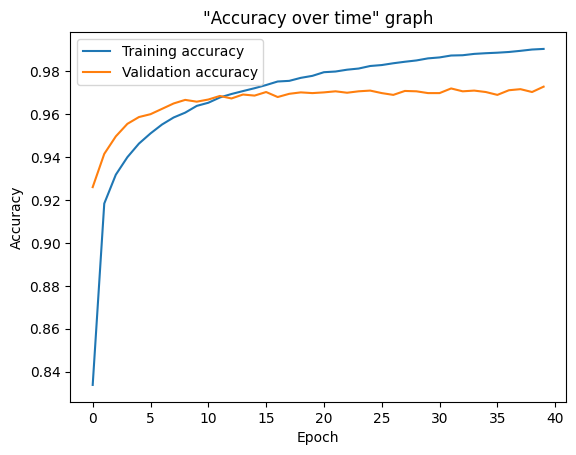

10 random elements of test dataset:
1/1 [==============================] - 0s 62ms/step
Prediction: 6 

1/1 [==============================] - 0s 20ms/step
Prediction: 8 

1/1 [==============================] - 0s 25ms/step
Prediction: 4 

1/1 [==============================] - 0s 27ms/step
Prediction: 5 

1/1 [==============================] - 0s 23ms/step
Prediction: 7 

1/1 [==============================] - 0s 24ms/step
Prediction: 8 

1/1 [==============================] - 0s 22ms/step
Prediction: 6 

1/1 [==============================] - 0s 24ms/step
Prediction: 6 

1/1 [==============================] - 0s 22ms/step
Prediction: 4 

1/1 [==============================] - 0s 24ms/step
Prediction: 9 



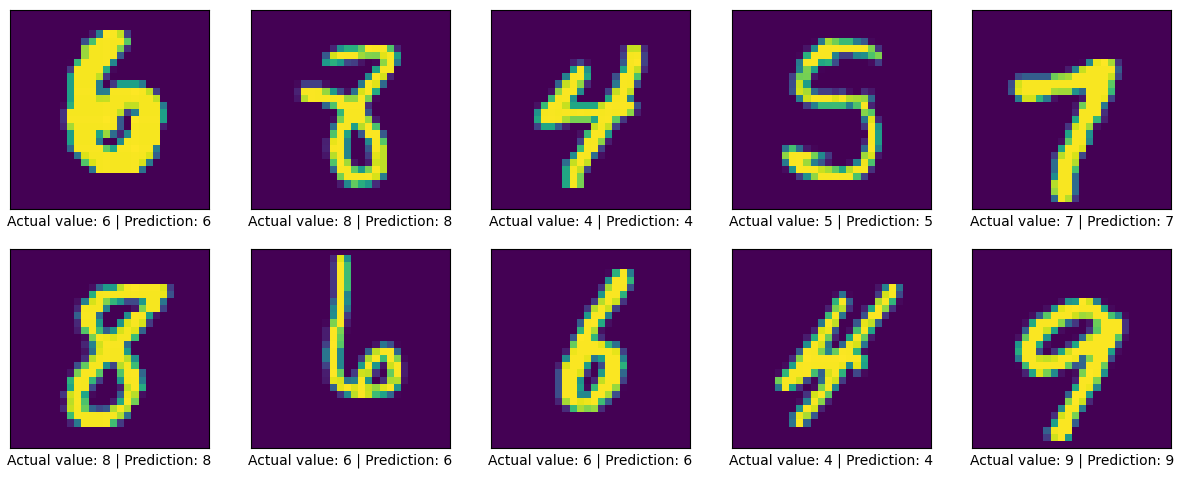

Predictions for each element:


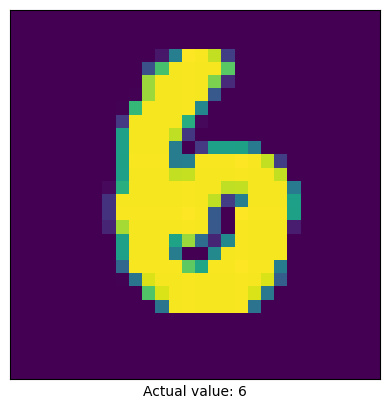

1/1 [==============================] - 0s 24ms/step
Prediction: 6



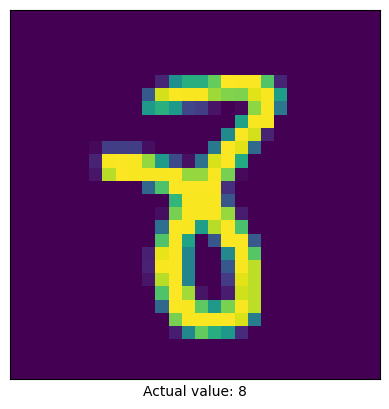

1/1 [==============================] - 0s 33ms/step
Prediction: 8



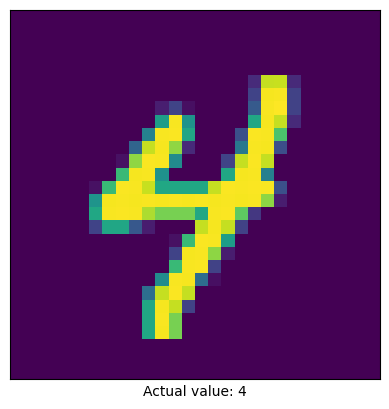

1/1 [==============================] - 0s 23ms/step
Prediction: 4



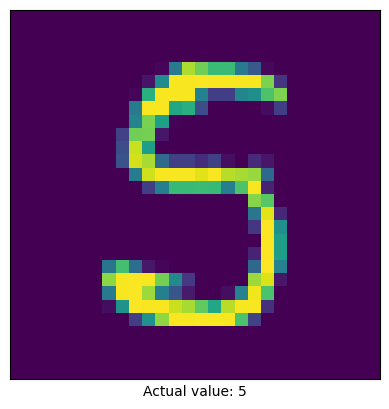

1/1 [==============================] - 0s 28ms/step
Prediction: 5



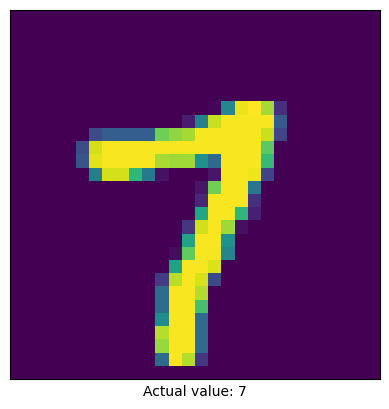

1/1 [==============================] - 0s 26ms/step
Prediction: 7



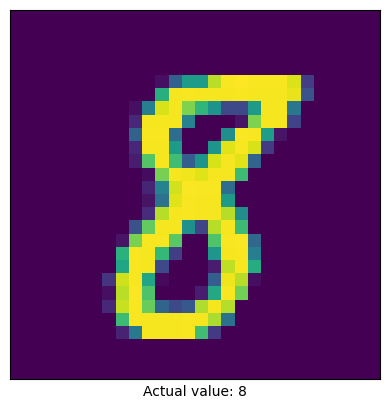

1/1 [==============================] - 0s 24ms/step
Prediction: 8



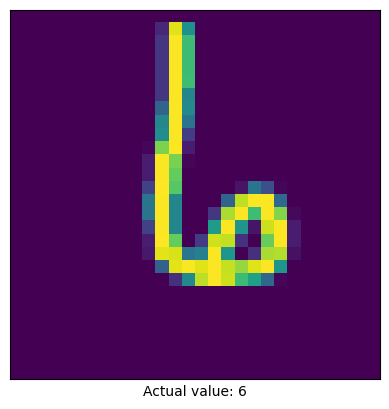

1/1 [==============================] - 0s 24ms/step
Prediction: 6



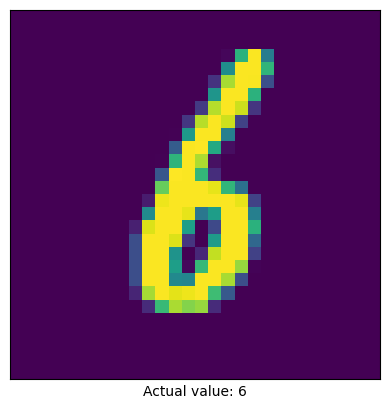

1/1 [==============================] - 0s 25ms/step
Prediction: 6



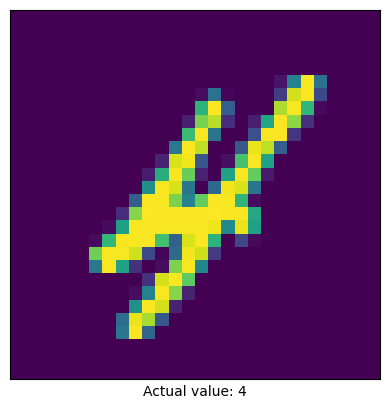

1/1 [==============================] - 0s 23ms/step
Prediction: 4



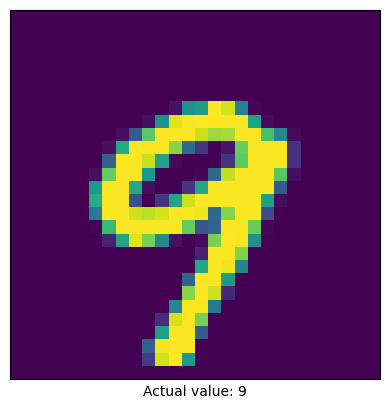

1/1 [==============================] - 0s 25ms/step
Prediction: 9



In [133]:
# Main part of the code that uses all created functions
if __name__ == "__main__":
    # New sequential model creation
    model = create_model()

    # Training model and getting training history, testing loss and accuracy
    train_history, test_loss, test_accuracy = train_model(model, 40, 200)
    print('==================================================================================================================================')
    print(f'Test loss: {test_loss}')
    print(f'Test accuracy: {test_accuracy}')
    print('==================================================================================================================================')

    # Distplaying stats
    show_loss_n_accuracy_info(train_history.history)

    # Viewing model predictions on 10 randon elements from test part of mnist dataset
    test_model_predictions_for_rnd_elements(model, image_test, value_test)

# Test zone

[6938 3821 8768  752 1599 4136 2743 4523 9617 7741]
3821
6938
3821
8768
752
1599
4136
2743
4523
9617
7741
0
1
2
3
4
5
6
7
8
9


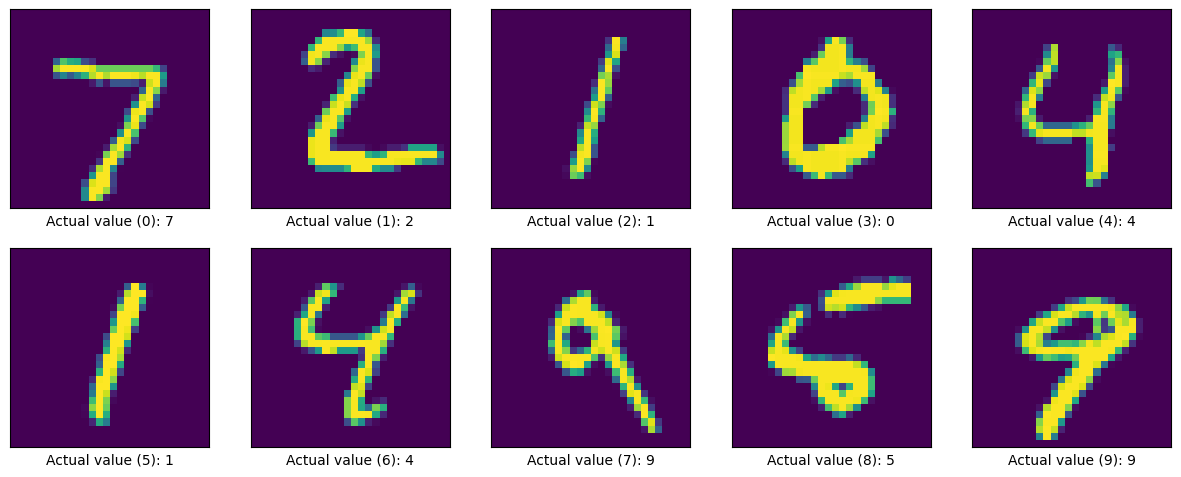

In [134]:
random_index = np.random.choice(image_test.shape[0], size = 10, replace = False)
print(random_index)
print(random_index[1])

for i in random_index:
    print(i)

test_shit = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
for i in test_shit:
    print(i)

plt.figure(figsize = (15, 15))
j = 0

for i in test_shit:
    j += 1
    plt.subplot(5, 5, j)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_test[i])
    plt.xlabel(f'Actual value ({i}): {np.argmax(value_test[i])}')
plt.show()
